In [7]:
import pandas as pd

injuryLog = pd.read_csv('BMPMammalOnlyKeeperLog.csv')

injuryLog.head()

,Timestamp,Animal,Staff,Log Type,Date,Time,Feeding Log,Did you feed all individuals?,"If not, who did you feed?",What did you feed? (Weight per animal) [<0.1 lb],...,Did you sedate?,Vet Log,Type.2,Vet name,Type.3,Location,Notes.1,Reminders,Reminder Date,Reminder/Note
0,12/1/2024 10:43,Red Fox,Jake,Feeding/Observation,12/1/2024,10:30:00 AM,NaN,Yes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12/1/2024 10:45,Wolf,Jake,Habitat Cleaning/Observation,12/1/2024,10:00:00 AM,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12/1/2024 10:43,Bobcat,Jake,Feeding/Observation,12/1/2024,9:00:00 AM,NaN,Yes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11/30/2024 16:31,Bobcat,Jake,Feeding/Observation,11/30/2024,4:45:00 PM,NaN,Yes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11/30/2024 16:32,Red Fox,Jake,Feeding/Observation,11/30/2024,4:30:00 PM,NaN,Yes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
injuryLog = injuryLog[injuryLog['Log Type'] == "Medical"]

In [13]:
med_cols = ['Timestamp','Animal','Staff','Log Type','Date','Time','Animal Name','Encounter Type','Type','Injury description','Exam Type','Animal sedated?','Vet notified?','Vet response','Did you administer medication?','Sedation Log','Sedation medication used','Which sedation kit was used?','Administration method','Dose','Time administered','Time to respond','Medication Log','Type.1','Dose.1','Administration Route','Did animal take medication?','Did you sedate?','Vet Log','Type.2','Vet name','Type.3','Location','Notes']

injuryLog_df = injuryLog[med_cols]

## Encounter Type: Injury

In [16]:
injuryLog_df = injuryLog_df[~injuryLog_df["Encounter Type"].isin(['Medication','Vet Visit','Vaccine','Sedation'])]

In [18]:
injuryLog_df['Encounter Type'].unique()

array(['DPE due to not getiting up or eating iin am. ',
       'Acting abnormal ', 'Observation ', 'Observation / update',
       'Hair loss update', 'Injury', 'Vomit.', 'Hacking type cough ',
       'Potentially injestion of soft plastic',
       'Visual display of hiding in den and pacing from ahuli, ref food. Bodaway reported to have been scooting/dragging his butt ',
       'Vomit found in back of house',
       'Regurge found in back of house,bile w a few eggshell bits covered in straw',
       'Potential bile found in back of house habitat and cash not seen eating in two days',
       'Potential injury'], dtype=object)

In [30]:
injury_cols = ['Timestamp','Animal','Staff','Log Type','Date','Time','Animal Name','Encounter Type','Type','Injury description','Exam Type','Vet notified?','Vet response']

injury_df = injuryLog_df[injury_cols]

injury_df.head()

,Timestamp,Animal,Staff,Log Type,Date,Time,Animal Name,Encounter Type,Type,Injury description,Exam Type,Vet notified?,Vet response
476,8/18/2024 16:38,Red Fox,Miranda,Medical,8/18/2024,12:35:00 PM,Jamie,DPE due to not getiting up or eating iin am.,New Injury,Reported by Jake in am to have no interest in ...,PE,No,NaN
484,8/19/2024 9:44,Red Fox,Miranda,Medical,8/18/2024,9:00:00 AM,Jamie,Acting abnormal,New Injury,Did not come up to me when I went into habitat...,VE,No,NaN
542,8/13/2024 8:54,Bobcat,Miranda,Medical,8/12/2024,10:00:00 AM,Cash or carter,Observation,New Injury,"Potential regurge in habitat, took photos. The...",VE,No,NaN
936,6/7/2024 11:42,Wolf,Miranda,Medical,6/7/2024,10:00:00 AM,Ela,Observation / update,Old Injury,Left hind leg,"VE, has been almost a week off meds, she has b...",Yes,No response yet
1001,5/27/2024 14:11,Red Fox,Miranda,Medical,5/26/2024,6:00:00 PM,Jamie,Hair loss update,Old Injury,Bald spot a bit larger but no breakage of skin,PE,Yes,Continue to monitor


In [32]:
print(injury_df.isna().sum())

print(injury_df.shape)

Timestamp              0
Animal                 0
Staff                  0
Log Type               0
Date                   0
Time                   0
Animal Name            0
Encounter Type         0
Type                   0
Injury description     0
Exam Type              0
Vet notified?          0
Vet response          16
dtype: int64
(21, 13)


In [34]:
injury_df['Vet response'].fillna('None', inplace=True)

C:\Users\Shauhardha\AppData\Local\Temp\ipykernel_74260\2038848154.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  injury_df['Vet response'].fillna('None', inplace=True)
C:\Users\Shauhardha\AppData\Local\Temp\ipykernel_74260\2038848154.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  injury_df['Vet response'].fillna('None', inplace=True)

In [36]:
injury_df['Vet response'].unique()

array(['None', 'No response yet', 'Continue to monitor',
       'Start same medication cycle as Winema, Meloxicam 7.5 mg tab (.5 pill dose) 1x daily for 1 week.',
       'Vet previously contacted',
       '7.5mg (1/2 tab) meloxicam 2x daily and cephalexin 500mg 2 tabs 2x daily'],
      dtype=object)

In [38]:
injury_df.to_csv('InjuryLog.csv', index=False)

## Visualization

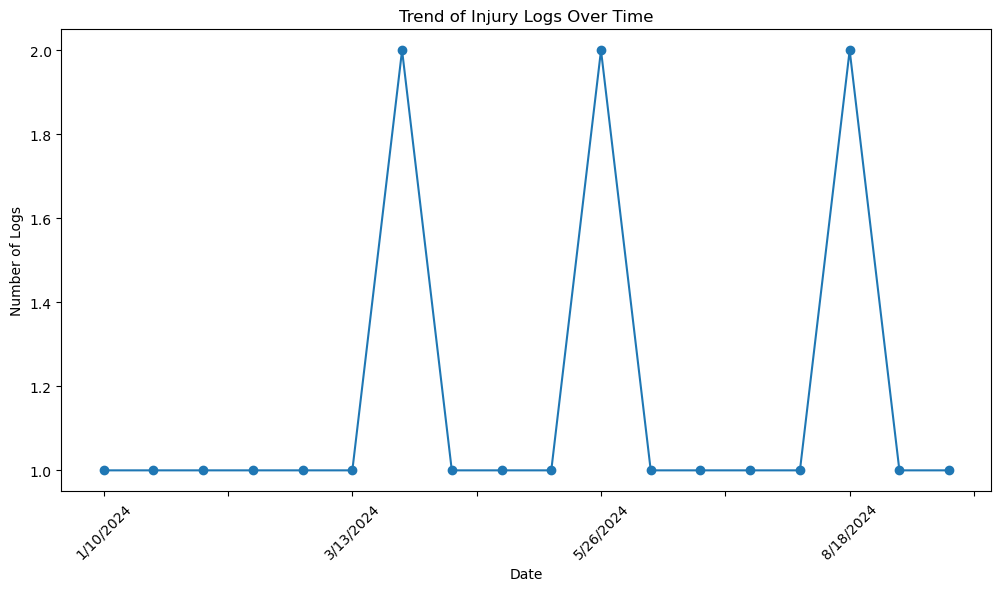

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

df = injury_df.copy()

plt.figure(figsize=(12, 6))
df['Date'].value_counts().sort_index().plot(kind='line', marker='o')
plt.xlabel("Date")
plt.ylabel("Number of Logs")
plt.title("Trend of Injury Logs Over Time")
plt.xticks(rotation=45)
plt.show()


C:\Users\Shauhardha\AppData\Local\Temp\ipykernel_74260\2654499959.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Type", palette="Set2")


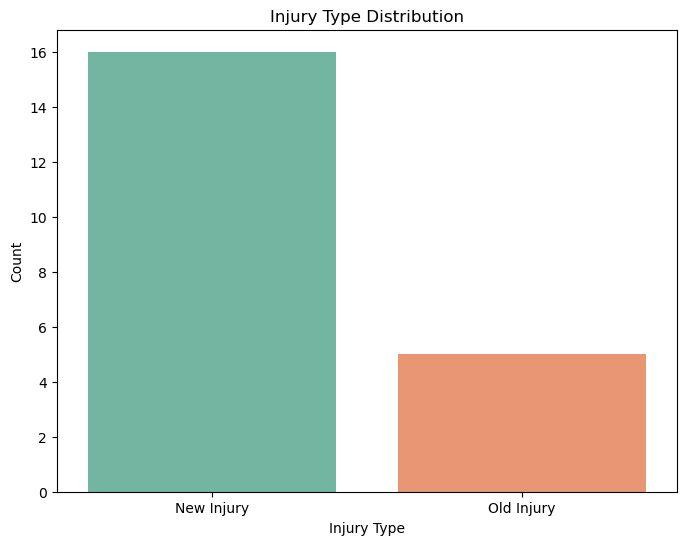

In [43]:
# Injury Type Distribution

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="Type", palette="Set2")
plt.xlabel("Injury Type")
plt.ylabel("Count")
plt.title("Injury Type Distribution")
plt.show()


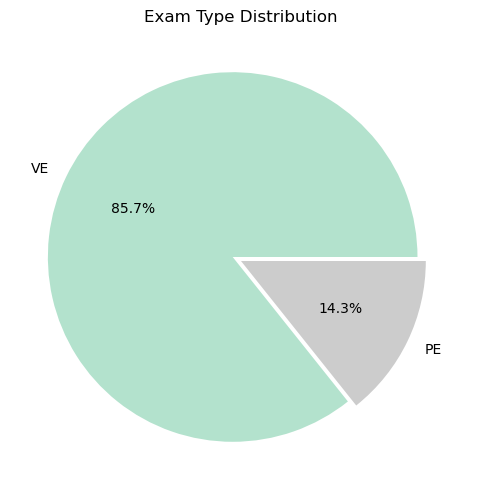

In [61]:
# Exam Type Distribution

df["Exam Type Category"] = df["Exam Type"].apply(lambda x: "PE" if "PE" in x else "VE" if "VE" in x else "Other")

plt.figure(figsize=(6, 6))
df["Exam Type Category"].value_counts().plot(kind="pie", autopct="%1.1f%%", cmap="Pastel2", explode=[0.05, 0])
plt.title("Exam Type Distribution")
plt.ylabel("")
plt.show()

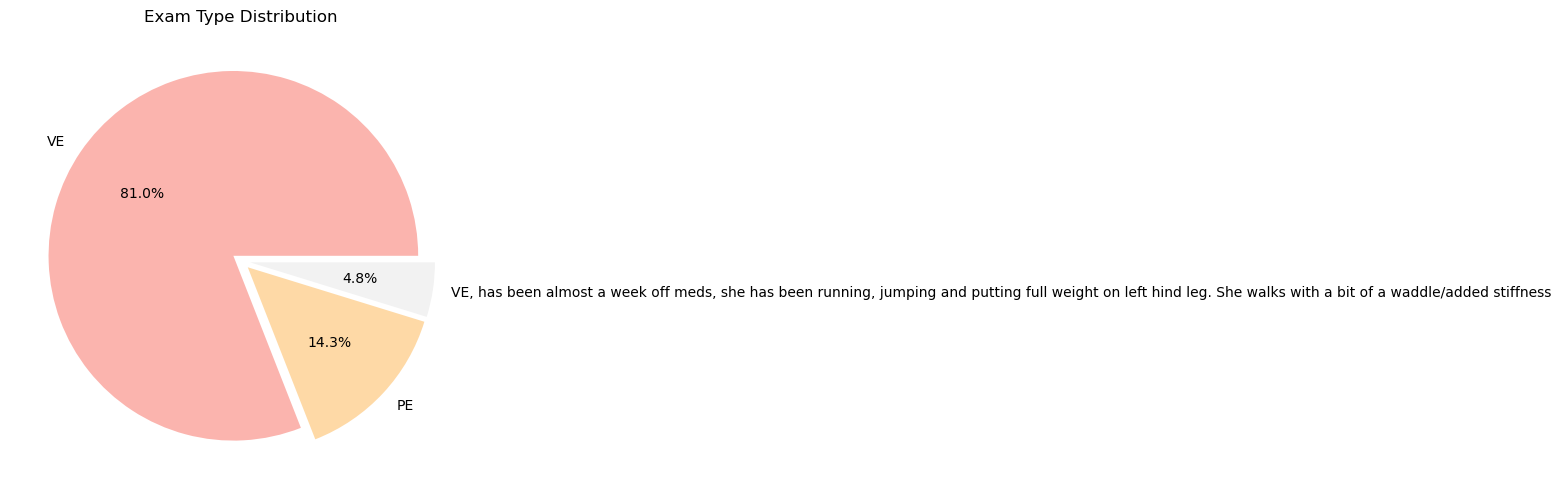

In [57]:
plt.figure(figsize=(6, 6))

# Get the value counts
exam_type_counts = df["Exam Type"].value_counts()

# Create explode array dynamically (small separation for all slices)
explode = [0.05] * len(exam_type_counts)

# Plot the pie chart
exam_type_counts.plot(kind="pie", autopct="%1.1f%%", cmap="Pastel1", explode=explode)

plt.title("Exam Type Distribution")
plt.ylabel("")  # Remove the default y-label
plt.show()


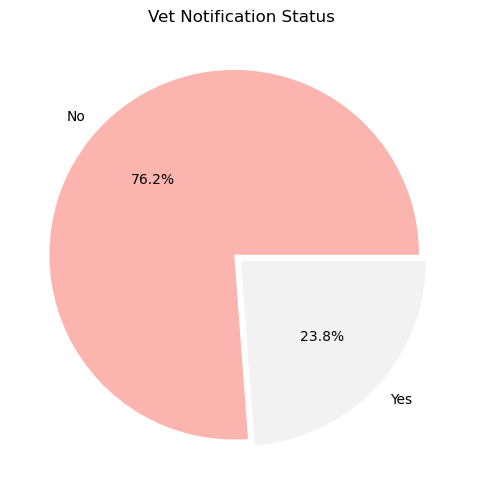

In [47]:
# Vet notification status

plt.figure(figsize=(6, 6))
df["Vet notified?"].value_counts().plot(kind="pie", autopct="%1.1f%%", cmap="Pastel1", explode=[0.05, 0])
plt.title("Vet Notification Status")
plt.ylabel("")
plt.show()


C:\Users\Shauhardha\AppData\Local\Temp\ipykernel_74260\3230173064.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["Animal"], order=df["Animal"].value_counts().index, palette="Blues_r")


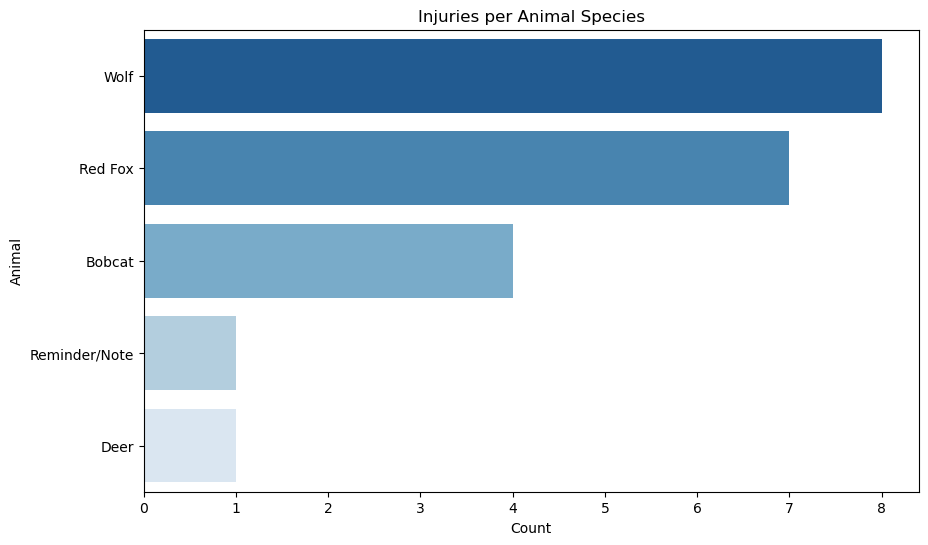

In [49]:
# Injury per Animal

plt.figure(figsize=(10, 6))
sns.countplot(y=df["Animal"], order=df["Animal"].value_counts().index, palette="Blues_r")
plt.xlabel("Count")
plt.ylabel("Animal")
plt.title("Injuries per Animal Species")
plt.show()


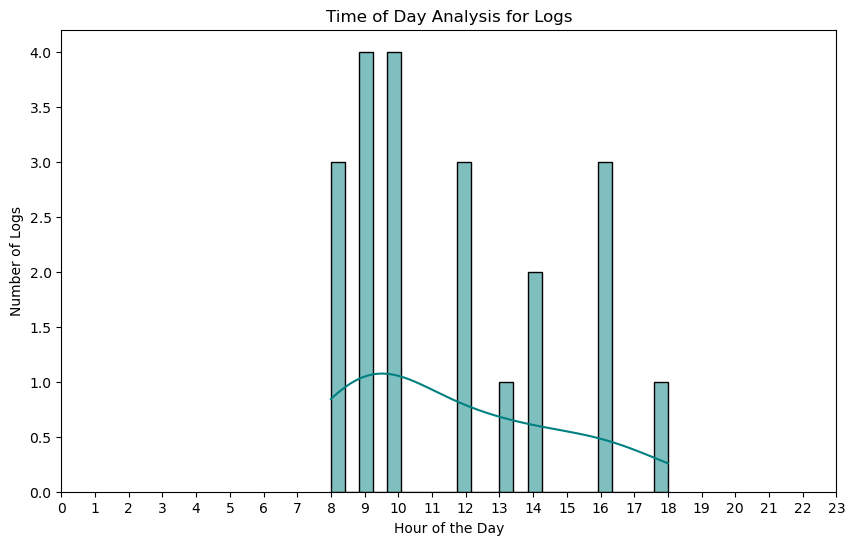

In [51]:
# Time of day analysis for log

df['Hour'] = pd.to_datetime(df['Time'], format='%I:%M:%S %p').dt.hour  # Convert Time to Hour

plt.figure(figsize=(10, 6))
sns.histplot(df['Hour'], bins=24, kde=True, color="teal")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Logs")
plt.title("Time of Day Analysis for Logs")
plt.xticks(range(0, 24))
plt.show()